FAKE REVIEW DETECTION

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score
import string
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("fake reviews dataset.csv")

In [3]:
data.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


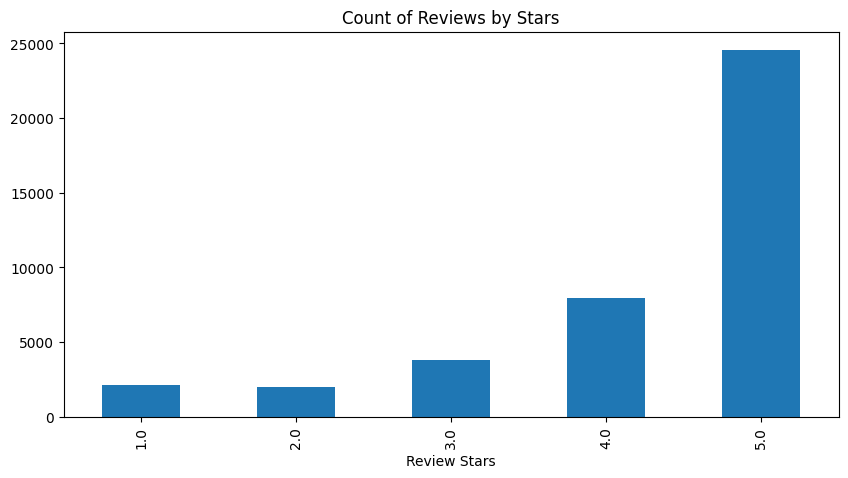

In [4]:
ax = data['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
data.shape

(40432, 4)

In [6]:
data.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [7]:
data.shape

(40432, 4)

In [8]:
new_data = data.drop(["category", "rating"], axis=1)
new_data.head(10)

,label,text_
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...
5,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,CG,They are the perfect touch for me and the only...
7,CG,These done fit well and look great. I love th...
8,CG,"Great big numbers & easy to read, the only thi..."
9,CG,My son loves this comforter and it is very wel...


In [9]:
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def text_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)   
    return text

[nltk_data] Downloading package stopwords to C:\Users\KRISHNA
[nltk_data]     CHAITHANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
new_data['text_'] = new_data["text_"].apply(text_cleaning)

In [11]:
new_data.head(20)

,label,text_
0,CG,love well made sturdi comfort love itveri pr...
1,CG,love great upgrad origin ive mine coupl year
2,CG,pillow save back love look feel pillow
3,CG,miss inform use great product price
4,CG,nice set good qualiti set two month
5,CG,want differ flavor
6,CG,perfect touch thing wish littl space
7,CG,done fit well look great love smooth edg extra
8,CG,great big number easi read thing didnt like size
9,CG,son love comfort well made also babi


In [12]:
new_data = new_data.head(40400)
new_data = new_data.sample(frac=1)

In [13]:

new_data.to_csv("cleandata.csv", index=False)

In [14]:
cleandata = pd.read_csv("cleandata.csv")
cleandata.shape

(40400, 2)

In [15]:
cleandata['id'] = range(1, len(cleandata) + 1)
cleandata.head(10)

,label,text_,id
0,OR,dog love snack dog differ,1
1,CG,excit find item expect lot one happi product...,2
2,OR,nice robe return caus big,3
3,OR,dang time found sturdi citrus squeezer ive lo...,4
4,OR,attract crate easi open put togeth posit rod ...,5
5,CG,excel book good histori book make reader thin...,6
6,OR,chisel set excel well design cuttingshap remo...,7
7,OR,fascin stori one england disrupt social polici...,8
8,CG,realli fun enjoy read love charact histori w...,9
9,OR,mani peopl report vinyl nice heavi white x g...,10


In [16]:
x = cleandata["text_"]
y = cleandata["label"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=36)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorization = TfidfVectorizer()
xv_train_np = vectorization.fit_transform(x_train)
xv_test_np = vectorization.transform(x_test)


Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
LR = LogisticRegression()
#LR.fit(xv_train, y_train)
LR.fit(xv_train_np, y_train)

C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression()

In [22]:
#LR.score(xv_test, y_test)
LR.score(xv_test_np, y_test)

C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.8688118811881188

In [23]:
#pred_LR = LR.predict(xv_test)
pred_LR = LR.predict(xv_test_np)

In [24]:
print(classification_report(y_test, pred_LR))

C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

          CG       0.87      0.86      0.87      4022
          OR       0.87      0.87      0.87      4058

    accuracy                           0.87      8080
   macro avg       0.87      0.87      0.87      8080
weighted avg       0.87      0.87      0.87      8080



C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


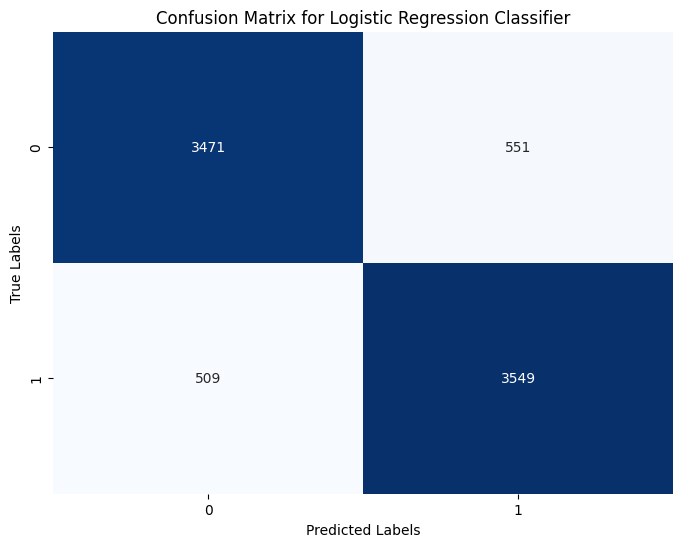

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_LR)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

In [26]:


# Load the dataset
df = pd.read_csv("cleandata.csv")

# Convert labels to binary
df['label_binary'] = df['label'].apply(lambda x: 0 if x == 'CG' else 1)

# TF-IDF vectorization of text reviews
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['text_'])

# Target variable
y = df['label_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.13145924300592188
R2 Score: 0.4741591296608709


C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Classification Report:
              precision    recall  f1-score   support

     Genuine       0.83      0.83      0.83      4029
        Fake       0.83      0.83      0.83      4051

    accuracy                           0.83      8080
   macro avg       0.83      0.83      0.83      8080
weighted avg       0.83      0.83      0.83      8080



C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\KRISHNA CHAITHANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


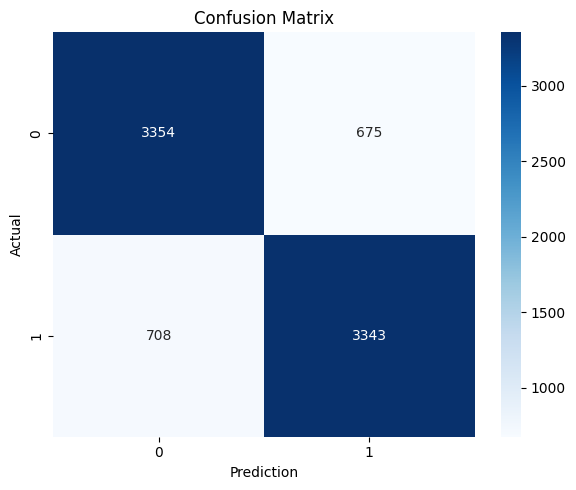

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predictions to binary (threshold = 0.5)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary, target_names=["Genuine", "Fake"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            )
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [28]:
def output_label(n):
    return "Fake Review" if n == 1 else "Not A Fake Review"

def manual_testing(review):
    testing_review = {"text_": [review]}
    new_def_test = pd.DataFrame(testing_review)

    # Clean the text
    new_def_test["text_"] = new_def_test["text_"].apply(text_cleaning)
    new_x_test = new_def_test["text_"]

    # Vectorize for both models
    xv_logreg = vectorization.transform(new_x_test)
    xv_linreg = tfidf.transform(new_x_test)

    # Logistic Regression Prediction (handle CG/OR strings)
    pred_logreg = LR.predict(xv_logreg)
    pred_log_bin = 0 if pred_logreg[0] == 'CG' else 1

    # Linear Regression Prediction
    pred_linreg_value = lr.predict(xv_linreg)[0]
    pred_linreg = 1 if pred_linreg_value >= 0.5 else 0

    # Output
    print("\nLogistic Regression Prediction:", output_label(pred_log_bin))
    print("Linear Regression Prediction:", output_label(pred_linreg))


In [29]:
review = input()
manual_testing(review)

I've been using this laptop for over a month now, and it's been fantastic for both work and entertainment. The battery life easily lasts a full day, the screen is bright and clear, and the keyboard feels great to type on. It's definitely a reliable choice for anyone needing a portable machine.

Logistic Regression Prediction: Not A Fake Review
Linear Regression Prediction: Not A Fake Review


In [33]:
import joblib

# Save models
joblib.dump(LR, "logreg_model.pkl")
joblib.dump(lr, "linreg_model.pkl")
joblib.dump(vectorization, "logreg_vectorizer.pkl")
joblib.dump(tfidf, "linreg_vectorizer.pkl")


['linreg_vectorizer.pkl']